<h3> Richa Phulwani - OLA 5 </h3>

In [40]:
# NN-Tools
import numpy as np
import keras
from keras import optimizers
# Visualization
from IPython.display import SVG
from IPython.display import display
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
# Printing
from sympy import *
init_printing(use_latex=True)
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

<h4> Problem 1</h4>

In [2]:
# XOR data set
X = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
display(Matrix(X))
Y = np.array([0,1,1,0])
display(Matrix(Y))

⎡-1  -1⎤
⎢      ⎥
⎢-1  1 ⎥
⎢      ⎥
⎢1   -1⎥
⎢      ⎥
⎣1   1 ⎦

⎡0⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣0⎦

In [136]:
# Multi-layer net with ReLU hidden layer
model = keras.models.Sequential()
# Here we make the hidden layer (size 2) with a ReL
# activation function, but also initialize the bias
# weights in the network to a constant 0.1
model.add(keras.layers.Dense(2,input_dim=2,activation='relu',
bias_initializer=keras.initializers.Constant(0.1)))
# Output layer (size 1), sigmoid activation function
model.add(keras.layers.Dense(1,activation='sigmoid'))
# Compile as above (default learning rate and other
# hyperparameters for the Adam optimizer).
adam = optimizers.adam(beta_1=0.9, beta_2=0.999, decay=0.1, lr= 0.05)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Display the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


In [137]:
for i in model.get_weights():
    display(Matrix(i))

⎡-1.10224  0.301065⎤
⎢                  ⎥
⎣0.870007  1.16484 ⎦

⎡0.1⎤
⎢   ⎥
⎣0.1⎦

⎡-0.562193⎤
⎢         ⎥
⎣-0.883742⎦

[0.0]

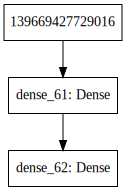

In [138]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

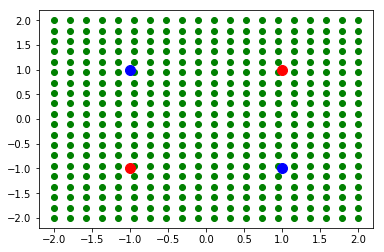

In [139]:
# Sample plot of classification space
xpoints = np.linspace(-2,2,20)
ypoints = np.linspace(-2,2,20)
xgrid, ygrid = np.meshgrid(xpoints,ypoints)
positions = np.vstack([xgrid.ravel(),ygrid.ravel()]).T
# Green grid points where we will evaluate the network
# outputs.
plt.plot(positions[:,0],positions[:,1],'go')
# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)
# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()

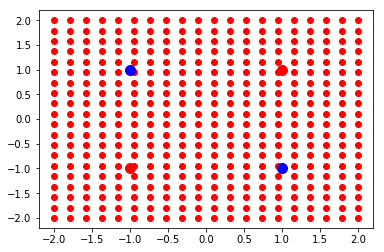

In [140]:
# Let's color those points by the classification labels...
predictions = model.predict_classes(positions)[:,0]
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]
# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')
# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)
# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()

In [141]:
# Train it!
history = model.fit(X, Y,
batch_size=1,
epochs=1000,
verbose=0)

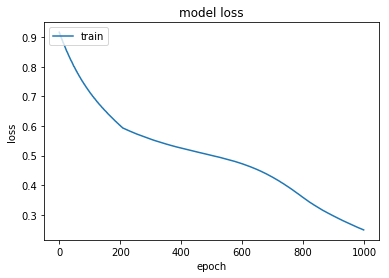

In [142]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

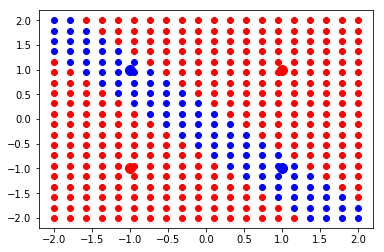

In [143]:
# Let's color those points by the classification labels...
predictions = model.predict_classes(positions)[:,0]
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]
# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')
# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)
# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()

In [144]:
score = model.evaluate(X,Y,verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 1s 131ms/step
Test loss: 0.2484196275472641
Test accuracy: 1.0


<h4> Problem 2 </h4>

<h4> The hyperparameters that were changed from the tutorial were the learning rate, decay rate, and Beta 1 and 2. The learning rate was set to a slower rate and the beta 1 and 2 hyperparameters were utilized to take advantage of adam's momentum methods, which allow the network to keep track of the last update and direction the network moves toward. The weights were also intialized to a small number that is just a little higher than one, which allows the network to avoid zero weights. The network also has a hidden layer. Binary cross entropy also takes into account the error. </h4>

<h4> Problem 3 </h4>

In [155]:
# Multi-layer net with ReLU hidden layer
model = keras.models.Sequential()
# Here we make the hidden layer (size 2) with a ReL
# activation function, but also initialize the bias
# weights in the network to a constant 0.1
model.add(keras.layers.Dense(2,input_dim=2,activation='relu',
bias_initializer=keras.initializers.Constant(0.1)))
# Output layer (size 1), sigmoid activation function
model.add(keras.layers.Dense(1,activation='sigmoid'))
# Compile as above (default learning rate and other
# hyperparameters for the Adam optimizer).
adam = optimizers.adam(beta_1=0.9, beta_2=0.999, decay=0.1, lr= 0.05)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Display the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


In [156]:
for i in model.get_weights():
    display(Matrix(i))

⎡0.0218835  0.439797⎤
⎢                   ⎥
⎣0.0611049  0.999459⎦

⎡0.1⎤
⎢   ⎥
⎣0.1⎦

⎡0.954071⎤
⎢        ⎥
⎣-1.21649⎦

[0.0]

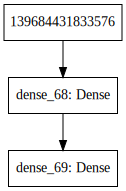

In [157]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

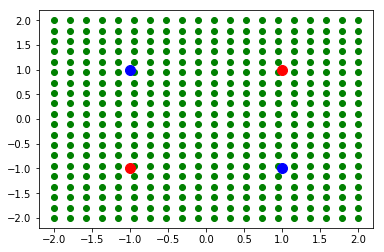

In [158]:
# Sample plot of classification space
xpoints = np.linspace(-2,2,20)
ypoints = np.linspace(-2,2,20)
xgrid, ygrid = np.meshgrid(xpoints,ypoints)
positions = np.vstack([xgrid.ravel(),ygrid.ravel()]).T
# Green grid points where we will evaluate the network
# outputs.
plt.plot(positions[:,0],positions[:,1],'go')
# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)
# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()

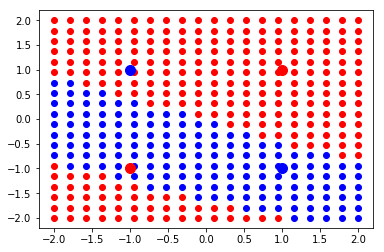

In [159]:
# Let's color those points by the classification labels...
predictions = model.predict_classes(positions)[:,0]
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]
# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')
# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)
# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()

In [160]:
# Train it!
history = model.fit(X, Y,
batch_size=1,
epochs=1000,
verbose=0)

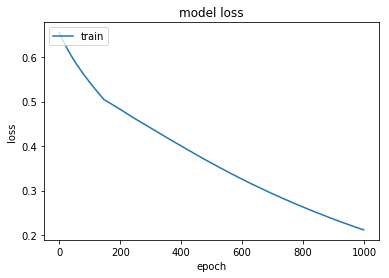

In [161]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

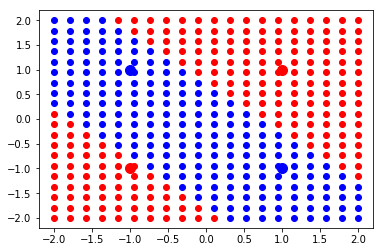

In [162]:
# Let's color those points by the classification labels...
predictions = model.predict_classes(positions)[:,0]
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]
# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')
# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)
# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()

In [163]:
score = model.evaluate(X,Y,verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 1s 228ms/step
Test loss: 0.2112531214952469
Test accuracy: 1.0


<h4> Problem 4 </h4>

<h4> Relu networks have a smaller number of layers since the gradient is always passed back for at least half the units. This helps the network learn more effciently, and the number of layers can be decreased. </h4>

<h4> Problem 5 </h5>

In [165]:
from keras.datasets import mnist
# Digits are zero through nine, so 10 classes
num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)
# Data normalization (0-255 is encoded as 0-1 instead)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
# Shape information
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
y_train shape: (60000, 10)
60000 train samples
10000 test samples


In [283]:
model = keras.models.Sequential()
# Linear
model.add(keras.layers.Dense(num_classes, activation='tanh',input_shape=[x_train.shape[1]], ))
model.add(keras.layers.Dense(num_classes,activation='tanh'))

adam = optimizers.adam(beta_1=0.9, beta_2=0.999, decay=1E-7, lr= 0.001)

model.compile(loss=keras.losses.categorical_crossentropy,
optimizer='adam',
metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_211 (Dense)            (None, 10)                7850      
_________________________________________________________________
dense_212 (Dense)            (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [285]:
# Train it!
history = model.fit(x_train, y_train,
batch_size=128,
epochs=2,
verbose=0,
validation_split = 0.3)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 6.1965635299682615
Test accuracy: 0.1032


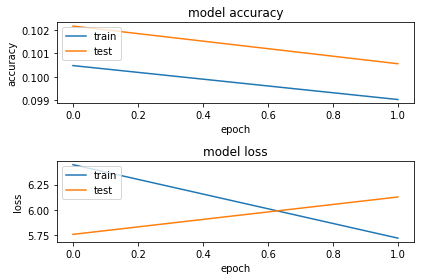

In [286]:
plt.figure()
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

<h4> Problem 6 </h4>

In [273]:
from keras.datasets import mnist
# Digits are zero through nine, so 10 classes
num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)
# Data normalization (0-255 is encoded as 0-1 instead)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
# Shape information
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
y_train shape: (60000, 10)
60000 train samples
10000 test samples


In [280]:
model = keras.models.Sequential()
# Linear
model.add(keras.layers.Dense(num_classes, activation='relu',input_shape=[x_train.shape[1]], ))
model.add(keras.layers.Dense(30,activation='relu'))
model.add(keras.layers.Dense(num_classes,activation='relu'))

adam = optimizers.adam(beta_1=0.9, beta_2=0.999, decay=1E-7, lr= 0.001)

model.compile(loss=keras.losses.categorical_crossentropy,
optimizer='adam',
metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_208 (Dense)            (None, 10)                7850      
_________________________________________________________________
dense_209 (Dense)            (None, 30)                330       
_________________________________________________________________
dense_210 (Dense)            (None, 10)                310       
Total params: 8,490
Trainable params: 8,490
Non-trainable params: 0
_________________________________________________________________


In [281]:
# Train it!
history = model.fit(x_train, y_train,
batch_size=128,
epochs=3,
verbose=0,
validation_split = 0.3)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: nan
Test accuracy: 0.098


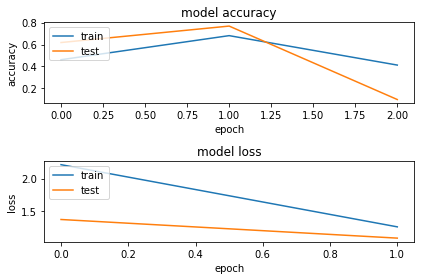

In [282]:
plt.figure()
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

<h4> Problem 7 </h4>

<h4> For some reason, the networks decreased in accuracy as more epochs occured. The accuracy for the Relu hit a high after 1 epoch and then started decreasing, and rapidly.The tanh network hit a high accuracy early, and then decreased gradually. For both, I think the network started overfitting the data, maybe because of the number of units in the network and the learning rate. Since relu trains networks faster than tanh, that might be why the accuracy plummets so fast. </h4> 